In [189]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [198]:
#What are the most prevalent causes of death in the us?
#Reading Csv File and peekin at the data
csv_path = Path(r"C:\Users\quint\Downloads\Project 1 Data Sets\NCHS_-_Leading_Causes_of_Death__United_States_20240411.csv")
death_df = pd.read_csv(csv_path)
# death_df["Cause Name"] = death_df["Cause Name"].replace("CLRD", "Chronic Respiratory Issues")
death_df.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8


In [191]:
#Grabbing all different causes of death as defined by the dataset
causename_column = death_df["Cause Name"]
unique_names = causename_column.unique()
print(unique_names)

['Unintentional injuries' 'All causes' "Alzheimer's disease" 'Stroke'
 'CLRD' 'Diabetes' 'Heart disease' 'Influenza and pneumonia' 'Suicide'
 'Cancer' 'Kidney disease']


In [180]:
#Total heart disease deaths
#Currently wrong since theres values per state and combined united states within the same year
heart_disease_df = death_df.loc[death_df["Cause Name"].str.contains("Heart disease")]
sum_hd_df = heart_disease_df["Deaths"].sum()
print(sum_hd_df)


24445280


AttributeError: Rectangle.set() got an unexpected keyword argument 'barcolor'

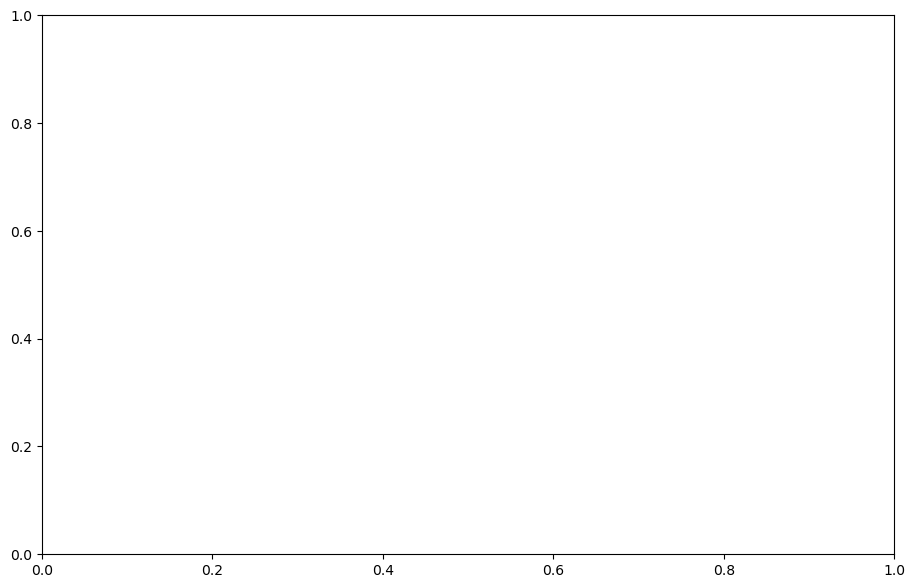

In [195]:
#Visualization comparing Causes of death over alltime?? or see what visualization would be helpful
#bar graph showing total deaths per cause over entire dataframe
us_df = death_df[(death_df["State"] == "United States") & 
                 (death_df['Year'].between(1999, 2017))]
us_df = us_df[us_df['Cause Name'] != "All causes"]
cause_deaths = us_df.groupby('Cause Name')['Deaths'].sum()
custom_colors = ["goldenrod", "goldenrod", "firebrick","goldenrod", "firebrick", "goldenrod","goldenrod", "goldenrod", "goldenrod", "goldenrod","goldenrod", "goldenrod"]
plt.figure(figsize=(11, 7))
cause_deaths.plot(kind='bar', barcolor="custom_colors")
plt.title('Total Deaths by Cause in the United States (1999-2017)')
plt.xlabel("Cause Name")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()
# plt.savefig('bar_graph.png', format='png', dpi=300)

<Figure size 1200x1000 with 0 Axes>

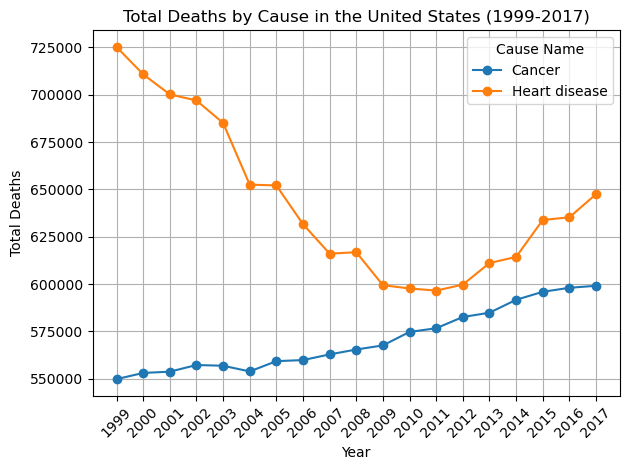

In [182]:
#useless but wanted to know how to grab
us_df = death_df[(death_df['State'] == "United States") & (death_df['Year'].between(1999, 2017))]
bcause_deaths = us_df.groupby(['Year', 'Cause Name'])['Deaths'].sum().unstack()

# Filter cause_deaths DataFrame to include only "Cancer" and "Heart disease"
bcause_deaths = bcause_deaths[['Cancer', 'Heart disease']]

# Plot the data as a line chart
plt.figure(figsize=(12, 10), facecolor= "gray")
bcause_deaths.plot(kind='line', marker='o')
plt.title('Total Deaths by Cause in the United States (1999-2017)')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.grid(True)
plt.legend(title='Cause Name')
plt.xticks(bcause_deaths.index, rotation=45)
plt.tight_layout()
plt.savefig("second_chart.png", format='png', bbox_inches='tight')

<Figure size 1000x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

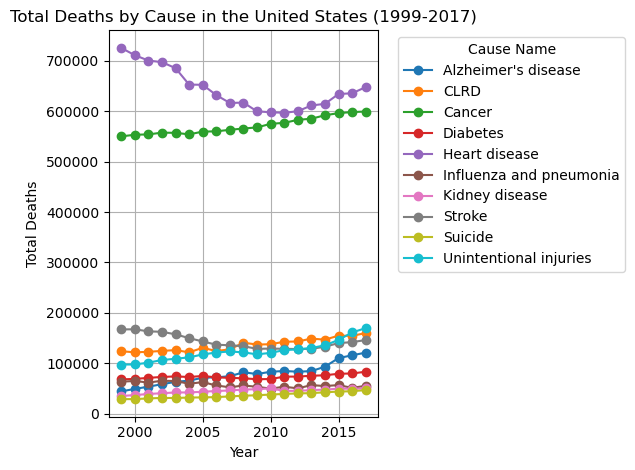

In [183]:
#Line chart displaying most common cause of death over the entire data set

us_df = death_df[(death_df['State'] == "United States") & (death_df['Year'].between(1999, 2017))]
us_df = us_df[us_df['Cause Name'] != "All causes"]
line_cause_deaths = us_df.groupby(['Year', 'Cause Name'])['Deaths'].sum().unstack()
plt.figure(figsize=(10, 6))
plt.figure().set_facecolor("lightgray")
line_cause_deaths.plot(kind='line', marker='o')
plt.title("Total Deaths by Cause in the United States (1999-2017)")
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.grid(True)
plt.legend(title='Cause Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
# plt.savefig("line_chart.png", format='png', bbox_inches='tight')

<Figure size 1000x600 with 0 Axes>

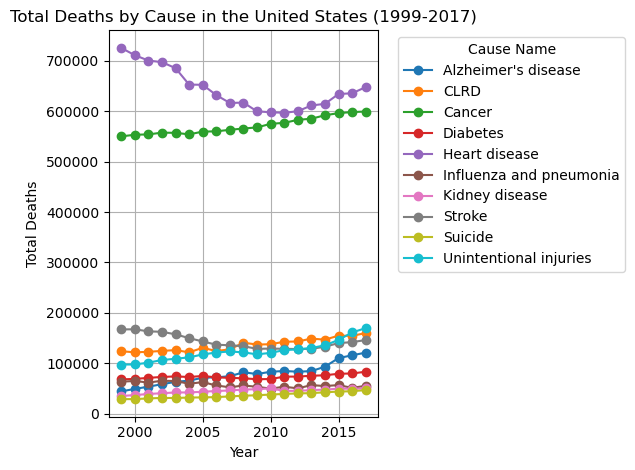

In [184]:
#testing gettin cute
us_df = death_df[(death_df['State'] == "United States") & (death_df['Year'].between(1999, 2017))]

# Remove rows where "Cause Name" is "All causes"
us_df = us_df[us_df['Cause Name'] != "All causes"]

# Group by "Cause Name" and sum the "Deaths" for each cause
line_cause_deaths = us_df.groupby(['Year', 'Cause Name'])['Deaths'].sum().unstack()

# Create a figure and set its background color
plt.figure(figsize= (10, 6), facecolor= "gray")


# Plot the data as a line chart
line_cause_deaths.plot(kind='line', marker='o')
plt.title("Total Deaths by Cause in the United States (1999-2017)")
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.grid(True)
plt.legend(title='Cause Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show() 

<Figure size 640x480 with 0 Axes>

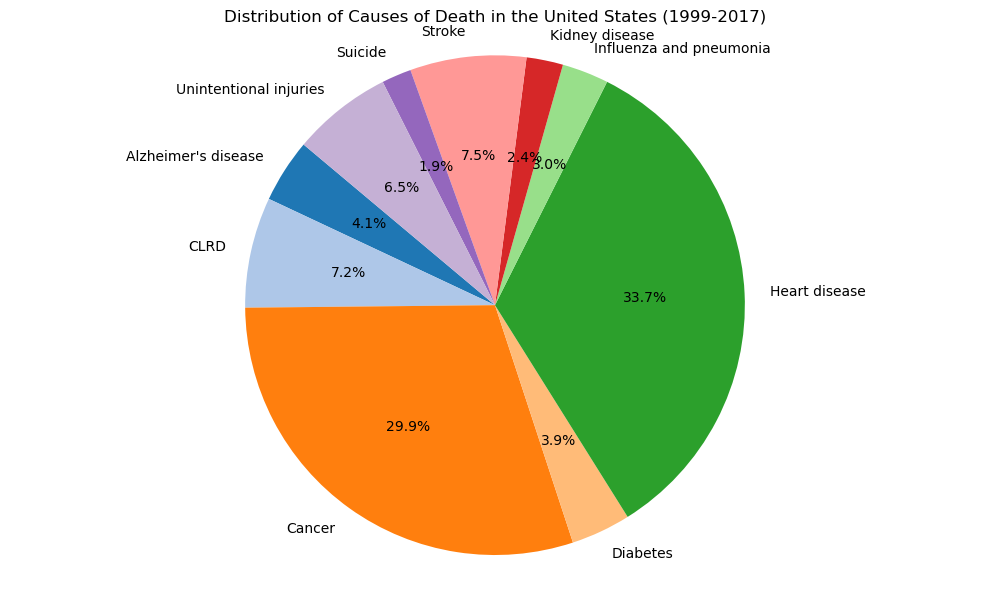

In [185]:
us_df = death_df[(death_df["State"] == "United States") & (death_df["Year"].between(1999, 2017))]
us_df = us_df[us_df['Cause Name'] != "All causes"]
cause_deaths = us_df.groupby('Cause Name')['Deaths'].sum()
plt.clf()
plt.figure(figsize=(10, 6))
cause_deaths.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Causes of Death in the United States (1999-2017)')
plt.ylabel('')
plt.axis('equal')  
plt.tight_layout()
plt.show()
# plt.savefig('pie_chart.png', format='png', bbox_inches='tight')


In [186]:
#pulling 2016
# sixteen_df = death_df[(death_df["Year"] == 2016) & 
                        # (death_df["Cause Name"] == "Heart disease") & 
                        # (death_df["State"] == "United States")]
# deaths_value = sixteen_df.iloc[0, -2]
# print("Deaths in 2016 from Heart Disease:", deaths_value)

In [187]:
#Pull per state per year
# illinois_seventeen_df = death_df[(death_df["Year"] == 2017) & 
                        # (death_df["Cause Name"] == "Heart disease") & 
                        # (death_df["State"] == "Illinois")]
# deaths_value = illinois_seventeen_df.iloc[0, -2]
# print("Deaths in 2017 from Heart Disease in Illinois:", deaths_value)

In [188]:

#to make a correct version i need to create a df that only pulls from the state "United States"

#heart_diseases_df = death_df[(death_df["Cause Name"] == "Heart disease") & 
#                             (death_df["State"] == "United States")]
#deaths_per_year = heart_diseases_df.groupby("Year")['Deaths'].sum()
#plt.clf()
#plt.figure(figsize=(10, 6))
#deaths_per_year.plot(kind='bar', color='skyblue')
#plt.title('Deaths due to Heart Disease per Year')
#plt.xlabel('Year')
#plt.ylabel('Number of Deaths')
#plt.xticks(rotation=45)
#plt.ticklabel_format(style='plain', axis='y')
#plt.tight_layout()
#plt.show()




#On Monday make visuals
#showing how the number of deaths stack up from entire data set (heart disease obvi wins)(maybe see if breaking down by year would be worth it)
#Heart disease by state (Plot,bar,pie)
#Line chart showing prevalence of each cause of death from 99-17 (probs not every single cause of death probs just top five or so)